In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

For this assignment, I will be using data from edX, a platform that offers courses from Harvard and MIT online for free. This dataset includes information about 290 courses offered since 2012. Information about the course type and instructor are included, as well as the number of participants, the percentage of participants who completed certain activities, and some demographic information for course participants.

In [2]:
#load data
edx = pd.read_csv('edx.csv')
edx.head(10)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,...,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,...,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33
5,MITx,6.00x,02/04/2013,Introduction to Computer Science and Programming,Larry Rudolph,Computer Science,1,1,65380,6473,...,51.17,82.43,10.30,28.90,639.40,84.14,27.0,83.99,16.01,60.90
6,MITx,3.091x,02/05/2013,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,8270,838,...,65.16,80.25,10.22,23.49,68.11,59.29,27.0,73.30,26.70,58.99
7,MITx,14.73x,02/12/2013,The Challenges of Global Poverty,"Esther Duflo, Abhijit Banerjee","Government, Health, and Social Science",1,1,29044,6510,...,70.60,83.24,13.89,39.38,279.22,40.30,30.0,53.76,46.24,81.94
8,MITx,8.02x,02/18/2013,Electricity and Magnetism,"Walter Lewin, John Belcher, Peter Dourmashkin,...","Science, Technology, Engineering, and Mathematics",1,1,39178,3543,...,48.49,85.3,5.86,16.04,380.35,107.88,26.0,85.42,14.58,56.97
9,HarvardX,ER22x,03/02/2013,Justice,Michael Sandel,"Humanities, History, Design, Religion, and Edu...",1,1,58779,9425,...,51.07,---,21.86,20.98,186.61,13.67,30.0,60.42,39.58,69.78


In [3]:
#summarize statistics for percent of students certified
edx[['% Certified', '% Certified of > 50% Course Content Accessed']].describe()

,% Certified,% Certified of > 50% Course Content Accessed
count,290.000000,290.000000
mean,7.782586,31.445655
std,6.972437,19.751102
min,0.000000,0.000000
25%,2.407500,13.400000
50%,5.950000,31.270000
75%,10.687500,47.622500
max,33.980000,77.090000


When students enroll in the course, they have the opportunity to earn a certificate at the end for a fee. Overall, the mean percentage of participants certified is 7.78%, while the median is only 5.95%. When you include only students who accessed over 50% of the course content, the mean rises to 31.45% and the median rises to 31.27%.

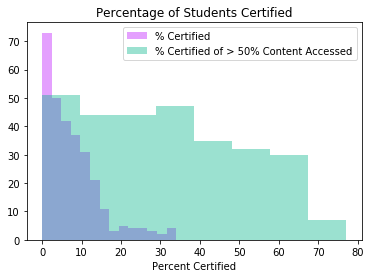

In [4]:
#histogram of percent of students certified
sns.distplot(edx['% Certified'], kde = False, label = '% Certified', color = '#bc13fe')
sns.distplot(edx['% Certified of > 50% Course Content Accessed'], kde = False, color = '#06b48b',
             label = '% Certified of > 50% Content Accessed')
plt.title("Percentage of Students Certified")
plt.legend(loc='upper right')
plt.xlabel('Percent Certified')
plt.show()

In [5]:
print('Percentage of courses with 0% students certified: ',len(edx[edx['% Certified']==0])/len(edx)*100)
print('Percentage of courses with more than 20% students certified: ',len(edx[edx['% Certified']>20])/len(edx)*100)
print('Percentage of courses with 0% students certified and greater than 50% of content accessed: ',len(edx[edx['% Certified of > 50% Course Content Accessed']==0])/len(edx)*100)
print('Percentage of courses with more than 50% students certified and greater than 50% of content accessed: ',len(edx[edx['% Certified of > 50% Course Content Accessed']>50])/len(edx)*100)

Percentage of courses with 0% students certified:  1.3793103448275863
Percentage of courses with more than 20% students certified:  7.241379310344828
Percentage of courses with 0% students certified and greater than 50% of content accessed:  1.3793103448275863
Percentage of courses with more than 50% students certified and greater than 50% of content accessed:  21.72413793103448


It is clear from the histogram that less than 10% of students are certified for the vast majority of the courses offered. When we instead look at the data for participants who have accessed more than 50% of the course content, the data is more spread out, but only 22% of courses have more than 50% of participants (who accessed more than 50% of course content) certified.

Next, I was curious whether any other course attributes had an effect on the percentage of students certified. First, I looked at the percent of students certified by course subject.

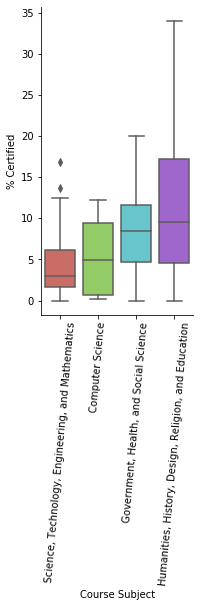

In [6]:
#boxplot of students certified
g = sns.catplot(y='% Certified', x='Course Subject', kind = 'box',palette = 'hls',
            data=edx)
g.set_xticklabels(rotation=85)
plt.show()

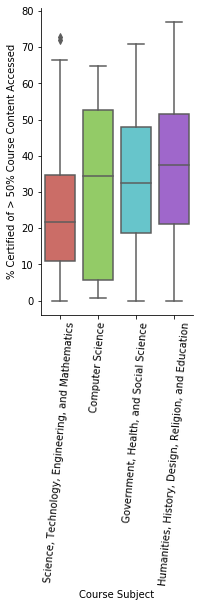

In [7]:
#boxplot of students certified who accessed 50% course content
h = sns.catplot(y='% Certified of > 50% Course Content Accessed', x='Course Subject', kind = 'box',palette = 'hls',
            data=edx)
h.set_xticklabels(rotation=85)
plt.show()

From these charts, it is clear that Humanities, History, Design, Religion, and Education courses have the highest certification rate, both for all students and for students who accessed more than 50% of course content.

To see if there was any particular reason for this, I looked at the percent of students certified versus the percent of female course participants.

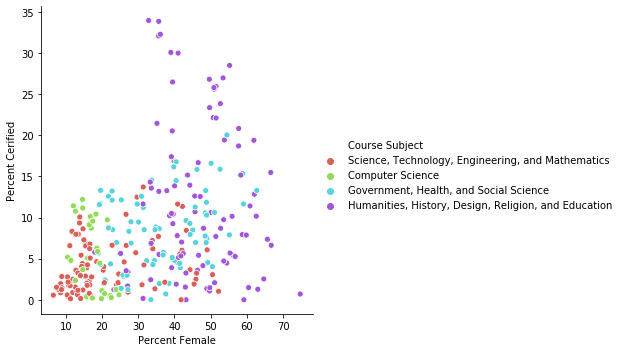

In [8]:
#scatterplot of percent female students vs percent certified
sns.relplot(x='% Female', y='% Certified', hue = 'Course Subject', palette = 'hls',
            data=edx)
plt.xlabel('Percent Female')
plt.ylabel('Percent Cerified')
plt.show()

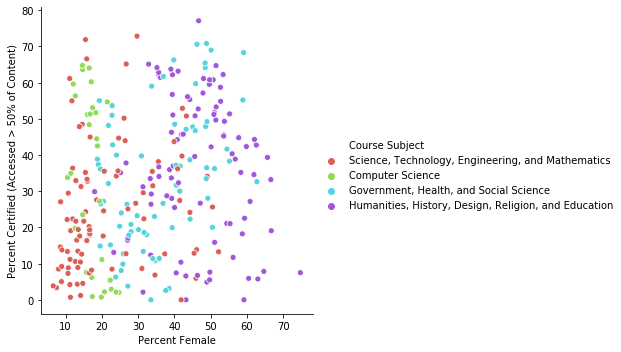

In [9]:
#scatter plot of percent female participants vs percent certified (accessed 50% course content)
sns.relplot(x='% Female', y='% Certified of > 50% Course Content Accessed', hue = 'Course Subject', palette = 'hls',
            data=edx)
plt.xlabel('Percent Female')
plt.ylabel('Percent Certified (Accessed > 50% of Content)')
plt.show()

There appears to be no correlation between the percent of female course participants and the percent of students certified.

Finally, I wanted to see whether there was any relationship between any of the other demographic variables (median age and percent of participants with a Bachelors Degree or higher) and the percentage of students certified. I also looked at whether there was any relationship between the median hours for certification and the percent of students certified.

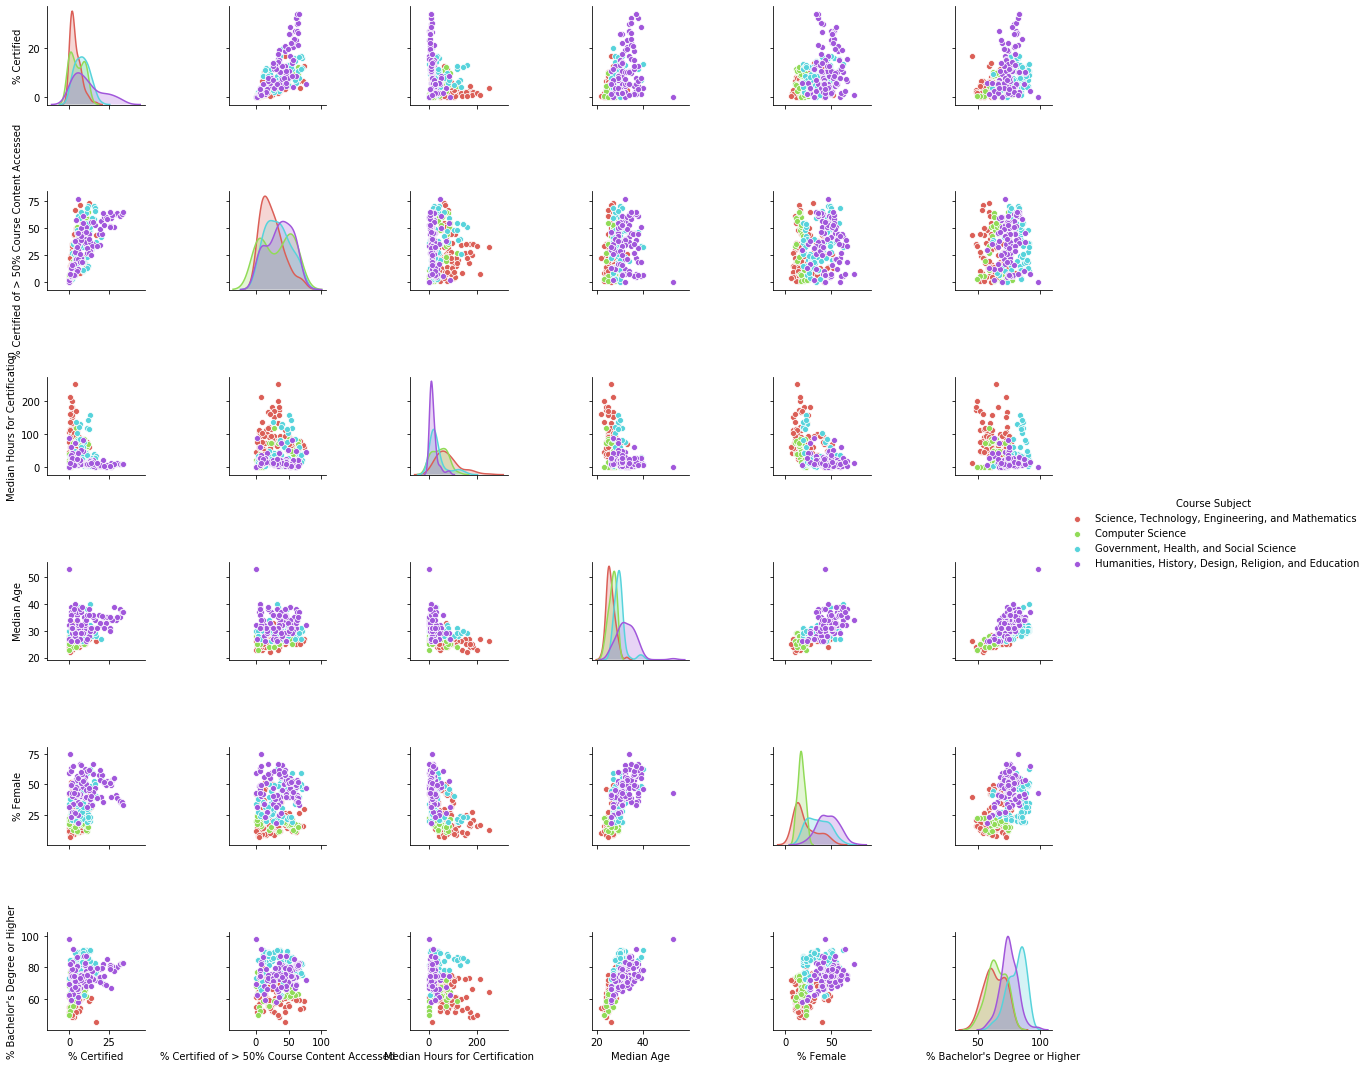

In [10]:
#pairplot of demographic variables and percentage of students certified
sns.pairplot(edx, hue = 'Course Subject', palette = 'hls',
             vars = ['% Certified', '% Certified of > 50% Course Content Accessed', 'Median Hours for Certification', 
                     'Median Age', '% Female', "% Bachelor's Degree or Higher"])
plt.show()

Based on the plots above, there does not seem to be a relationship between any of the variables in the chart above and the percent of participants certified in a particular course.

# Experiment
Based on the information above, edX wants to carry out an experiment to try to increase the percentage of students who are certified for completing the course. To try to increase the percentage of students who earn a course certification, they want to send out a weekly email that reminds students of the benefits of earning a course certification. The hypothesis for this experiment is that students who receive this email will sign up to receive a certification for the course that they are enrolled in at a higher rate than those who do not; this means that the null hypothesis for this experiment is that there will be no statistically significant difference between the percentage of students certified in the subset of students who receive the email and the percentage of students certified in the population that does not receive the email. 

**Rollout Plan** edX will start out by sending the email to 25% of students currently enrolled in a course. These students will be chosen by selecting 25% of the students who are enrolled in each course at random. Choosing the 25% of students from each course rather than from the entire population of students will help control for factors related to the individual course. The email will be sent out every Friday afternoon to the selected students for 1 month. After 1 month, students will be added to the sample (selected in the same manner as described above) until the sample is 50% of the total population. The email will be sent out for two more months, for a total of 3 months.  

**Success Metric** The success metric that we use in this experiment will be percentage of students who are certified for completing a course. We will measure success in this experiment by using a t-test with a p-value of 0.5. A secondary measure of interest in this experiment is whether the percentage of students who access more than 50% of the course content and earn a  course certification increases; however, something that we need to be careful of when looking at this metric is that our sample may not be representative of the overall population of students accessing more than 50% of the course content.